<a href="https://colab.research.google.com/github/LeonimerMelo/Reinforcement-Learning/blob/Reinforcement-Learning/Multi_Armed_Bandit_Problem_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Armed Bandit Problem
O **Problema do Bandido Multibraço (Multi-Armed Bandit)** é um problema fundamental em **Aprendizado por Reforço (Reinforcement Learning)**, frequentemente usado para estudar o equilíbrio entre **exploração** e **exploração**. Ele envolve um agente que toma decisões (puxar as alavancas de um bandido) para maximizar a recompensa total ao longo do tempo.

---

### Configuração do Problema

1. **Cenário**:
   - Imagine uma máquina caça-níqueis (um "bandido") com $ n $ alavancas.
   - Cada alavanca $ i $ fornece uma recompensa retirada de uma distribuição de probabilidade desconhecida com recompensa esperada $ \mu_i $.

2. **Objetivo**:
   - Identificar a melhor alavanca (ou um conjunto de boas alavancas) que maximiza a recompensa esperada ao longo de $ T $ passos de tempo.

3. **Dilema (Trade-Off)**:
   - **Exploration**: Experimentar alavancas para coletar mais informações sobre suas recompensas.
   - **Exploitation**: Escolher a alavanca que, com base nas informações anteriores, parece ser a melhor.

---

### Algoritmos para Resolver o Problema

Diversos algoritmos foram desenvolvidos para lidar com o dilema exploração-exploração:

#### 1. **Algoritmo ε-Greedy**
   - Com probabilidade $ \epsilon $, explora (escolhe uma alavanca aleatória).
   - Com probabilidade $ 1 - \epsilon $, explora (escolhe a alavanca com a maior recompensa estimada).

  Pseudocódigo:
  ```python
  if random() < epsilon:
      action = random_arm()
  else:
      action = arm_with_highest_estimated_reward()
   ```

#### 2. **UCB (Upper Confidence Bound)**
   - Equilibra exploração e exploração usando um intervalo de confiança para cada alavanca.
   - Escolhe a alavanca com o maior limite superior:
     $$
     a_t = \arg\max_i \left( \hat{\mu}_i + \sqrt{\frac{2 \ln t}{n_i}} \right)
     $$
     Onde:
     - $ \hat{\mu}_i $: Recompensa estimada da alavanca $ i $.
     - $ n_i $: Número de vezes que a alavanca $ i $ foi escolhida.
     - $ t $: Passo de tempo atual.

#### 3. **Thompson Sampling**
   - Uma abordagem Bayesiana para equilibrar exploração e exploração.
   - Modela a recompensa de cada alavanca como uma distribuição de probabilidade e escolhe ações com base em amostras dessas distribuições.

#### 4. **Seleção Softmax**
   - Usa uma abordagem probabilística para escolher alavancas com base em suas recompensas estimadas.
   - A probabilidade de escolher a alavanca $ i $ é proporcional a:
$$P(i) = \frac{e^{\hat{\mu}_i / \tau}}{\sum_{j}^{e^{\hat{\mu}_i / \tau}}}$$
Onde $\tau$ (temperatura) controla o equilíbrio entre *exploration-exploitation trade-off*.

---

### Exemplo em Python: Algoritmo ε-Greedy

Aqui está uma implementação básica do algoritmo **ε-Greedy**:

```python
import numpy as np

# Configuração
num_arms = 5
num_steps = 1000
true_rewards = np.random.rand(num_arms)  # Recompensas verdadeiras para cada alavanca
epsilon = 0.1  # Taxa de exploração

# Inicialização
estimated_rewards = np.zeros(num_arms)  # Recompensas estimadas
counts = np.zeros(num_arms)  # Número de vezes que cada alavanca foi escolhida
total_reward = 0

# Simulação
for t in range(num_steps):
    if np.random.rand() < epsilon:
        # Explorar: Escolher uma alavanca aleatória
        arm = np.random.randint(num_arms)
    else:
        # Explorar: Escolher a alavanca com a maior recompensa estimada
        arm = np.argmax(estimated_rewards)
    
    # Puxar a alavanca escolhida
    reward = np.random.rand() < true_rewards[arm]  # Recompensa binária simulada (0 ou 1)
    
    # Atualizar estimativas
    counts[arm] += 1
    estimated_rewards[arm] += (reward - estimated_rewards[arm]) / counts[arm]
    
    # Atualizar recompensa total
    total_reward += reward

print(f"Recompensa Total: {total_reward}")
print(f"Recompensas Verdadeiras: {true_rewards}")
print(f"Recompensas Estimadas: {estimated_rewards}")
```

---

### Métricas-Chave

1. **Regret (Arrependimento)**:
   - Mede a perda causada por não escolher sempre a melhor alavanca.
   - $ R(T) = T \cdot \mu^* - \sum_{t=1}^T \mu_{a_t} $
     - $ \mu^* $: Recompensa esperada da melhor alavanca.
     - $ \mu_{a_t} $: Recompensa esperada da alavanca escolhida no tempo $ t $.

2. **Recompensa Cumulativa**:
   - Recompensa total obtida ao longo de $ T $ passos de tempo.

---

### Aplicações

1. **Sistemas de Recomendação**:
   - Sugerir itens com base nas preferências do usuário (e.g., filmes, produtos).

2. **Ensaios Clínicos**:
   - Testar diferentes tratamentos enquanto maximiza os resultados dos pacientes.

3. **Publicidade Online**:
   - Escolher anúncios que maximizem a taxa de cliques.

4. **IA para Jogos**:
   - Equilibrar exploração e exploração em tomadas de decisão estratégicas.

O **Problema do Bandido Multibraço** é um modelo simples, mas poderoso, que serve como ponto de partida para entender problemas mais complexos no aprendizado por reforço!

<img src='https://drive.google.com/uc?id=1d9hu840vJZME9rJhJQJpBC6hFYt7zgtB' width=700>

In [19]:
import numpy as np

# Setup
num_arms = 5
num_steps = 1000
np.random.seed(10)
true_rewards = np.random.rand(num_arms)  # True reward probabilities for each arm
epsilon = 0.2  # Exploration rate

# Initialization
estimated_rewards = np.zeros(num_arms)  # Estimated rewards for each arm
counts = np.zeros(num_arms)  # Number of times each arm was pulled
total_reward = 0
rwds = [0]
# Simulation
for t in range(num_steps):
    if np.random.rand() < epsilon:
        # Explore: Choose a random arm
        arm = np.random.randint(num_arms)
    else:
        # Exploit: Choose the arm with the highest estimated reward
        arm = np.argmax(estimated_rewards)

    # Pull the chosen arm
    reward = np.random.rand() < true_rewards[arm]  # Simulated binary reward (0 or 1)

    # Update estimates
    counts[arm] += 1
    estimated_rewards[arm] += (reward - estimated_rewards[arm]) / counts[arm]

    # Update total reward
    total_reward += reward
    rwds.append(np.mean(estimated_rewards))

# print(f"Total Reward: {total_reward}")
# print(f"True Rewards: {true_rewards}")
# print(f"Estimated Rewards: {estimated_rewards}")

# Resultados
print("Probabilidades Reais: ", true_rewards)
print("Recompensas Estimadas: ", estimated_rewards)
print("Seleções por Alavanca: ", counts)
print("Recompensa Cumulativa Total: ", total_reward)


Probabilidades Reais:  [0.77132064 0.02075195 0.63364823 0.74880388 0.49850701]
Recompensas Estimadas:  [0.78494624 0.06666667 0.72340426 0.77142857 0.53846154]
Seleções por Alavanca:  [744.  30.  47. 140.  39.]
Recompensa Cumulativa Total:  749


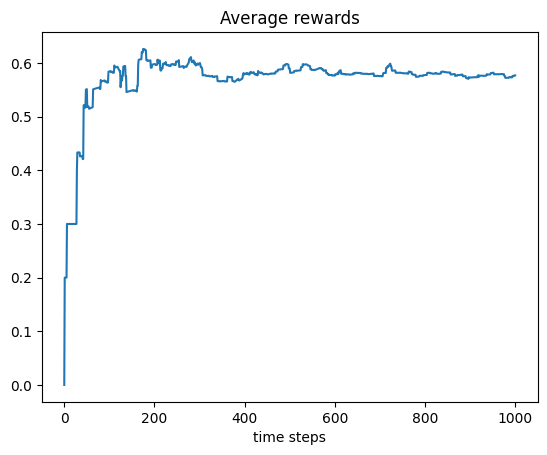

In [20]:
import matplotlib.pyplot as plt
plt.plot(rwds)
plt.title('Average rewards')
plt.xlabel('time steps')
plt.show()

## Atualizar a estimativa de recompensa

```python
# Update estimates
counts[arm] += 1
estimated_rewards[arm] += (reward - estimated_rewards[arm]) / counts[arm]

```
Esta parte do código é responsável por **atualizar a estimativa de recompensa média** para a alavanca escolhida com base no novo resultado obtido (recompensa). Vamos detalhar cada linha:

---

### Linha 1: `counts[arm] += 1`

- **O que faz:** Incrementa o contador de quantas vezes a alavanca $ arm $ foi puxada.
- **Por que é necessário:**
  - Para calcular a média incremental, precisamos saber o número total de vezes que a alavanca foi escolhida.
  - Esse valor será usado no cálculo da nova média.

Exemplo:
- Se a alavanca $ 2 $ foi puxada 3 vezes anteriormente, após esta linha, o contador será atualizado para 4.

---

### Linha 2: `estimated_rewards[arm] += (reward - estimated_rewards[arm]) / counts[arm]`

Essa linha usa a **fórmula de atualização incremental da média** para ajustar a recompensa estimada ($ \hat{\mu}_i $) da alavanca $ arm $ com base na nova recompensa $ reward $.

#### **Fórmula de Atualização Incremental**
A fórmula básica da média é:
$$
\hat{\mu}_i = \frac{\text{soma dos valores observados}}{\text{número de observações}}
$$
No entanto, recalcular a soma de todos os valores observados a cada atualização é ineficiente. Em vez disso, usamos uma fórmula incremental para atualizar a média sem precisar armazenar todas as recompensas anteriores:

$$
\hat{\mu}_i \gets \hat{\mu}_i + \frac{\text{(nova recompensa - média atual)}}{\text{número de vezes que a alavanca foi puxada}}
$$

- **Parte 1:** $(\text{reward} - \text{estimated_rewards[arm]})$
  - Calcula a diferença entre a recompensa recém-obtida ($ reward $) e a recompensa média atual estimada ($ \text{estimated_rewards[arm]} $).
  - Essa diferença indica o quanto o novo valor difere da média atual.

- **Parte 2:** $(\text{reward} - \text{estimated_rewards[arm]}) / \text{counts[arm]}$
  - Ajusta a diferença pelo número total de vezes que a alavanca foi puxada.
  - Isso garante que a média seja alterada de forma gradual e proporcional à quantidade de dados já observados.

- **Parte 3:** `estimated_rewards[arm] += ...`
  - Atualiza a recompensa média incrementalmente, incorporando a nova observação.

#### Exemplo Prático:
Imagine que:
- A recompensa estimada atual para a alavanca $ 2 $ seja $ \hat{\mu}_2 = 0.5 $,
- Essa alavanca foi puxada 4 vezes,
- A nova recompensa obtida ($ reward $) seja $ 1.0 $.

1. **Atualizar o contador**:
   $$
   \text{counts[2]} \gets 5
   $$

2. **Calcular a diferença entre a nova recompensa e a média atual**:
   $$
   \text{(reward - estimated_rewards[2])} = 1.0 - 0.5 = 0.5
   $$

3. **Atualizar a média**:
   $$
   \text{estimated_rewards[2]} \gets 0.5 + \frac{0.5}{5} = 0.5 + 0.1 = 0.6
   $$

Agora, a recompensa média estimada para a alavanca $ 2 $ foi ajustada para $ 0.6 $, levando em consideração a nova observação.

---

### Por que usar a fórmula incremental?

1. **Eficiência Computacional**:
   - Não precisamos armazenar todas as recompensas passadas para recalcular a média.
   - Apenas o valor atual da média e o número de observações são suficientes.

2. **Atualização Dinâmica**:
   - Cada nova recompensa tem menos impacto na média à medida que o número de observações aumenta, o que reflete melhor a confiança na estimativa.

---

### Resumo
Essa fórmula de atualização é uma maneira elegante e eficiente de calcular a média incrementalmente, permitindo que o algoritmo ajuste continuamente sua estimativa de recompensa com base em novos dados. É especialmente útil em problemas como o bandido multibraço, onde as recompensas são observadas progressivamente.

##Passoa a passo

In [ ]:
estimated_rewards = np.zeros(num_arms)  # Estimated rewards for each arm
counts = np.zeros(num_arms)  # Number of times each arm was pulled
total_reward = 0
print(estimated_rewards)
print(counts)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [ ]:
true_rewards = np.random.rand(num_arms)
true_rewards

array([0.41762441, 0.7373844 , 0.91337874, 0.34114791, 0.55892045])

In [ ]:
epsilon

0.2

Começa o loop:

In [ ]:
c = np.random.rand()
c

0.1811683077412788

In [ ]:
if c < epsilon:
    # Explore: Choose a random arm
    arm = np.random.randint(num_arms)
    print('exploration')
else:
    # Exploit: Choose the arm with the highest estimated reward
    arm = np.argmax(estimated_rewards)
    print('exploitation')

exploration


In [ ]:
arm

3

In [ ]:
true_rewards[arm]

0.34114790713481635

In [ ]:
r = np.random.rand()
r

0.17470270334649896

In [ ]:
# Pull the chosen arm and receve the reward (or not!)
reward = r < true_rewards[arm]
# reward is binary: True (=1) or False (=0)
reward

True

In [ ]:
counts[arm] += 1
counts[arm]

5.0

In [ ]:
counts

array([2., 0., 4., 5., 0.])

In [ ]:
estimated_rewards

array([0. , 0. , 1. , 0.5, 0. ])

In [ ]:
e = estimated_rewards[arm]
e

0.5

In [ ]:
# Calcula a diferença entre a recompensa recém-obtida (reward) e a recompensa média atual estimada
a = reward - e
a

0.5

In [ ]:
# Ajusta a diferença pelo número total de vezes que a alavanca foi puxada
b = a / counts[arm]
b

0.1

In [ ]:
# Atualiza a recompensa média incrementalmente
estimated_rewards[arm] = estimated_rewards[arm] + b
estimated_rewards[arm]

0.6

In [ ]:
total_reward += reward
total_reward

9

Retorna ao loop

### Exemplo de Recompensa Cumulativa no Problema do Bandido Multibraço

A **recompensa cumulativa** é a soma das recompensas obtidas ao longo de vários passos de tempo. Vamos construir um exemplo prático baseado no algoritmo **ε-Greedy** para calcular a recompensa cumulativa ao final de uma simulação.

---

### Código: Calculando Recompensa Cumulativa

```python
import numpy as np

# Configuração
num_arms = 3  # Número de alavancas
num_steps = 100  # Número de passos
true_rewards = [0.2, 0.5, 0.8]  # Probabilidades reais de recompensa para cada alavanca
epsilon = 0.1  # Taxa de exploração

# Inicialização
estimated_rewards = np.zeros(num_arms)  # Recompensas estimadas
counts = np.zeros(num_arms)  # Contador de seleções por alavanca
total_reward = 0  # Recompensa cumulativa inicial

# Simulação
for step in range(num_steps):
    # Escolher alavanca: Explorar ou Explorar
    if np.random.rand() < epsilon:
        arm = np.random.randint(num_arms)  # Escolher alavanca aleatória (explorar)
    else:
        arm = np.argmax(estimated_rewards)  # Escolher alavanca com maior recompensa estimada (explorar)
    
    # Puxar a alavanca escolhida e obter recompensa
    reward = np.random.rand() < true_rewards[arm]  # Simula recompensa (0 ou 1)
    
    # Atualizar estimativas
    counts[arm] += 1
    estimated_rewards[arm] += (reward - estimated_rewards[arm]) / counts[arm]
    
    # Atualizar recompensa cumulativa
    total_reward += reward

# Resultados
print("Probabilidades Reais: ", true_rewards)
print("Recompensas Estimadas: ", estimated_rewards)
print("Seleções por Alavanca: ", counts)
print("Recompensa Cumulativa Total: ", total_reward)
```

---

### Saída Exemplo (simulada)

Após executar o código acima, você pode obter algo como:

```plaintext
Probabilidades Reais:  [0.2, 0.5, 0.8]
Recompensas Estimadas:  [0.18, 0.52, 0.76]
Seleções por Alavanca:  [10, 30, 60]
Recompensa Cumulativa Total:  68
```

---

### Explicação dos Resultados

1. **Recompensas Verdadeiras**:
   - A probabilidade real de cada alavanca fornecer uma recompensa (exemplo: 20%, 50%, e 80%).

2. **Recompensas Estimadas**:
   - As estimativas calculadas pelo agente com base nas interações.

3. **Seleções por Alavanca**:
   - Quantas vezes cada alavanca foi puxada.

4. **Recompensa Cumulativa Total**:
   - A soma de todas as recompensas obtidas durante os $ num\_steps $.

---

### Interpretação da Recompensa Cumulativa

- Quanto mais o algoritmo consegue explorar as alavancas certas (com maior probabilidade de recompensa), maior será a **recompensa cumulativa**.
- No exemplo, a alavanca com 80% de probabilidade de recompensa foi puxada com mais frequência, resultando em uma alta recompensa total.

Este exemplo ilustra como o conceito de **recompensa cumulativa** mede o sucesso do agente ao equilibrar exploração e exploração no problema do bandido multibraço!

In [ ]:
import numpy as np

# Configuração
num_arms = 3  # Número de alavancas
num_steps = 100  # Número de passos
true_rewards = [0.2, 0.5, 0.8]  # Probabilidades reais de recompensa para cada alavanca
epsilon = 0.1  # Taxa de exploração

# Inicialização
estimated_rewards = np.zeros(num_arms)  # Recompensas estimadas
counts = np.zeros(num_arms)  # Contador de seleções por alavanca
total_reward = 0  # Recompensa cumulativa inicial

# Simulação
for step in range(num_steps):
    # Escolher alavanca: Explorar ou Explorar
    if np.random.rand() < epsilon:
        arm = np.random.randint(num_arms)  # Escolher alavanca aleatória (explorar)
    else:
        arm = np.argmax(estimated_rewards)  # Escolher alavanca com maior recompensa estimada (explorar)

    # Puxar a alavanca escolhida e obter recompensa
    reward = np.random.rand() < true_rewards[arm]  # Simula recompensa (0 ou 1)

    # Atualizar estimativas
    counts[arm] += 1
    estimated_rewards[arm] += (reward - estimated_rewards[arm]) / counts[arm]

    # Atualizar recompensa cumulativa
    total_reward += reward

# Resultados
print("Probabilidades Reais: ", true_rewards)
print("Recompensas Estimadas: ", estimated_rewards)
print("Seleções por Alavanca: ", counts)
print("Recompensa Cumulativa Total: ", total_reward)


Probabilidades Reais:  [0.2, 0.5, 0.8]
Recompensas Estimadas:  [0.25  0.375 0.25 ]
Seleções por Alavanca:  [88.  8.  4.]
Recompensa Cumulativa Total:  26
